# Big Data for Engineers – Exercises - Solutions

# Spring 2023 -  Week 11 - Rumble



# 0. RumbleSandbox

To play with simple JSONiq queries without installing RumbleDB, you can use the [RumbleDB sandbox](https://colab.research.google.com/github/RumbleDB/rumble/blob/master/RumbleSandbox.ipynb#scrollTo=u38jSNpB--QW).\
The sandbox uses a small public backend, so please install Rumble on your local machine for the rest of the exercise.

# 1. Install Java and Download Rumble
You might have noticed that the process is the same as in section 5 of Exercise06. BUT, a newer version of RumbleDB has been released since then :) Please download the latest RumbleDB 1.21.0 for this exercise.

## Option 1: Locally

To install the latest version of RumbleDB locally, you can follow the steps given on the official rumbledb website: 
https://rumble.readthedocs.io/en/latest/Getting%20started/

Please follow very carefully the instructions of "Method 1: with the large, standalone, RumbleDB jar (experimental)". In particular,
1. Download and install Java 8 or 11. Make sure that the Java version is correct by running `java -version` in the terminal.
2. Download the rumbledb-1.21.0-standalone.jar. You can put the jar file in the working directory of this exercise.

You also need to correctly set the `JAVA_HOME` environment variable. Please do this everytime you open a new terminal if you don't change the Bash initialization file. You can verify by running `echo $JAVA_HOME`. 

For example, on MacOS, for Java 11, (1) you can `export JAVA_HOME=$(/usr/libexec/java_home -v 11)`; or (2) `export JAVA_HOME=/Library/Java/JavaVirtualMachines/jdk-11.0.1.jdk/Contents/Home/` or a similar path that exists on your machine. \
On Linux/Windows OS there are similar methods to set `JAVA_HOME`.\


## Option 2: Github codespaces
If the local installation does not work for you, please use this option. See this [tutorial](https://cloud.inf.ethz.ch/s/KHLnq9HsQHfLHHQ/download) for running RumbleDB on Github codespaces.

## JSONiq shell
To launch a JSONiq shell, run:

`java -jar rumbledb-1.21.0-standalone.jar repl`

This gives access to the RumbleDB shell where you can try commands. Note that to run each command, you should press 'Enter' twice, and you can quit with 'exit'.

Feel free to try the many functions available, here is a link with the exhaustive list: https://rumble.readthedocs.io/en/latest/Function%20library/.

# 2. Setup Rumble in Jupyter Notebook



### Install Jupyter Notebook



In order to execute the queries in this notebook, you need to [install](https://jupyter.org/install) jupyter notebook on your **own machine**, and then download this notebook and [run](https://jupyter.readthedocs.io/en/latest/running.html#running) it locally rather than rely on the colab.

From now on, we want to run the code on this notebook instead of the shell, hence you can close the shell (Ctrl+C or type 'exit') and execute your own Rumble server by running:

`java -jar rumbledb-1.21.0-standalone.jar --server yes --port 9090`

The mount allows RumbleDB to directly read the files from your local disk, in this case your exercise folder of this week.

It is recommended to use the port 9090 which normally does not get occupied by other applications.

To verify that the RumbleDB is up and running, you can go to http://localhost:9090/public.html in a web browser and you can type queries there.

Then, you need to execute the cell below to activate the jsoniq magic (you do not need to understand what it does, this is just initialization Python code).

In [1]:
!pip install rumbledb
%load_ext rumbledb
%env RUMBLEDB_SERVER=http://localhost:9090/jsoniq

env: RUMBLEDB_SERVER=http://localhost:9090/jsoniq


Now we are all set! You can now start reading and executing the JSONiq queries in this notebook as you go, and you can even edit them!

# 3. JSONiq

## JSON

As explained on the [official JSON Web site](http://www.json.org/), JSON is a lightweight data-interchange format designed for humans as well as for computers. It supports as values:
- objects (string-to-value maps)
- arrays (ordered sequences of values)
- strings
- numbers
- booleans (true, false)
- null

JSONiq provides declarative querying and updating capabilities on JSON data.

## Elevator Pitch

JSONiq is based on XQuery, which is a W3C standard (like XML and HTML). XQuery is a very powerful declarative language that originally manipulates XML data, but it turns out that it is also a very good fit for manipulating JSON natively.
JSONiq, since it extends XQuery, is a very powerful general-purpose declarative programming language. Our experience is that, for the same task, you will probably write about 80% less code compared to imperative languages like JavaScript, Python or Ruby. Additionally, you get the benefits of strong type checking without actually having to write type declarations.
Here is an appetizer before we start the tutorial from scratch.


In [3]:
%%jsoniq

let $stores :=
[
  { "store number" : 1, "state" : "MA" },
  { "store number" : 2, "state" : "MA" },
  { "store number" : 3, "state" : "CA" },
  { "store number" : 4, "state" : "CA" }
]
let $sales := [
   { "product" : "broiler", "store number" : 1, "quantity" : 20  },
   { "product" : "toaster", "store number" : 2, "quantity" : 100 },
   { "product" : "toaster", "store number" : 2, "quantity" : 50 },
   { "product" : "toaster", "store number" : 3, "quantity" : 50 },
   { "product" : "blender", "store number" : 3, "quantity" : 100 },
   { "product" : "blender", "store number" : 3, "quantity" : 150 },
   { "product" : "socks", "store number" : 1, "quantity" : 500 },
   { "product" : "socks", "store number" : 2, "quantity" : 10 },
   { "product" : "shirt", "store number" : 3, "quantity" : 10 }
]
let $join :=
  for $store in $stores[], $sale in $sales[]
  where $store."store number" = $sale."store number"
  return {
    "nb" : $store."store number",
    "state" : $store.state,
    "sold" : $sale.product
  }
return [$join]

Took: 0.06418585777282715 ms
[{"nb": 1, "state": "MA", "sold": "broiler"}, {"nb": 1, "state": "MA", "sold": "socks"}, {"nb": 2, "state": "MA", "sold": "toaster"}, {"nb": 2, "state": "MA", "sold": "toaster"}, {"nb": 2, "state": "MA", "sold": "socks"}, {"nb": 3, "state": "CA", "sold": "toaster"}, {"nb": 3, "state": "CA", "sold": "blender"}, {"nb": 3, "state": "CA", "sold": "blender"}, {"nb": 3, "state": "CA", "sold": "shirt"}]


## And here you go

### Actually, you already knew some JSONiq

The first thing you need to know is that a well-formed JSON document is a JSONiq expression as well.
This means that you can copy-and-paste any JSON document into a query. The following are JSONiq queries that are "idempotent" (they just output themselves):

In [4]:
%%jsoniq
{ "pi" : 3.14, "sq2" : 1.4 }

Took: 0.018178224563598633 ms
{"pi": 3.14, "sq2": 1.4}


In [5]:
%%jsoniq
[ 2, 3, 5, 7, 11, 13 ]

Took: 0.01673293113708496 ms
[2, 3, 5, 7, 11, 13]


In [6]:
%%jsoniq
{
      "operations" : [
        { "binary" : [ "and", "or"] },
        { "unary" : ["not"] }
      ],
      "bits" : [
        0, 1
      ]
    }

Took: 0.018063068389892578 ms
{"operations": [{"binary": ["and", "or"]}, {"unary": ["not"]}], "bits": [0, 1]}


In [7]:
%%jsoniq
[ { "Question" : "Ultimate" }, ["Life", "the universe", "and everything"] ]

Took: 0.017025232315063477 ms
[{"Question": "Ultimate"}, ["Life", "the universe", "and everything"]]



This works with objects, arrays (even nested), strings, numbers, booleans, null.

It also works the other way round: if your query outputs an object or an array, you can use it as a JSON document. JSONiq is a declarative language. This means that you only need to say what you want - the compiler will take care of the how.

In the above queries, you are basically saying: I want to output this JSON content, and here it is.

## JSONiq basics

### The real JSONiq Hello, World!

Wondering what a hello world program looks like in JSONiq? Here it is:

In [8]:
%%jsoniq
"Hello, World!"

Took: 0.014234781265258789 ms
"Hello, World!"


Not surprisingly, it outputs the string "Hello, World!".

### Numbers and arithmetic operations

Okay, so, now, you might be thinking: "What is the use of this language if it just outputs what I put in?" Of course, JSONiq can more than that. And still in a declarative way. Here is how it works with numbers:

In [9]:
%%jsoniq
2 + 2

Took: 0.01718902587890625 ms
4


In [10]:
%%jsoniq
 (38 + 2) div 2 + 11 * 2


Took: 0.017850160598754883 ms
42


(mind the division operator which is the "div" keyword. The slash operator has different semantics).

Like JSON, JSONiq works with decimals and doubles:

In [11]:
%%jsoniq
 6.022e23 * 42

Took: 0.01671600341796875 ms
2.52924e+25


### Logical operations

JSONiq supports boolean operations.

In [12]:
%%jsoniq
true and false

Took: 0.016801118850708008 ms
false


In [13]:
%%jsoniq
(true or false) and (false or true)

Took: 0.0166168212890625 ms
true


The unary not is also available:

In [14]:
%%jsoniq
not true

Took: 0.017134666442871094 ms
false


### Strings

JSONiq is capable of manipulating strings as well, using functions:


In [15]:
%%jsoniq
concat("Hello ", "Captain ", "Kirk")

Took: 0.01720905303955078 ms
"Hello Captain Kirk"


In [16]:
%%jsoniq
substring("Mister Spock", 8, 5)

Took: 0.01688098907470703 ms
"Spock"


JSONiq comes up with a rich string function library out of the box, inherited from its base language. These functions are listed [here](https://www.w3.org/TR/xpath-functions-30/) (actually, you will find many more for numbers, dates, etc).



### Sequences

Until now, we have only been working with single values (an object, an array, a number, a string, a boolean). JSONiq supports sequences of values. You can build a sequence using commas:


In [17]:
%%jsoniq
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

Took: 0.016695737838745117 ms
1
2
3
4
5
6
7
8
9
10


In [18]:
%%jsoniq
1, true, 4.2e1, "Life"

Took: 0.016308069229125977 ms
1
true
42
"Life"


The "to" operator is very convenient, too:

In [19]:
%%jsoniq
 (1 to 100)

Took: 0.017055034637451172 ms
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


Some functions even work on sequences:

In [20]:
%%jsoniq
sum(1 to 100)

Took: 0.017038822174072266 ms
5050


In [21]:
%%jsoniq
string-join(("These", "are", "some", "words"), "-")

Took: 0.01677703857421875 ms
"These-are-some-words"


In [22]:
%%jsoniq
count(10 to 20)

Took: 0.01714777946472168 ms
11


In [23]:
%%jsoniq
avg(1 to 100)

Took: 0.016518831253051758 ms
50.5


Unlike arrays, sequences are flat. The sequence (3) is identical to the integer 3, and (1, (2, 3)) is identical to (1, 2, 3).

## A bit more in depth

### Variables

You can bind a sequence of values to a (dollar-prefixed) variable, like so:

In [24]:
%%jsoniq
let $x := "Bearing 3 1 4 Mark 5. "
return concat($x, "Engage!")

Took: 0.0174407958984375 ms
"Bearing 3 1 4 Mark 5. Engage!"


In [25]:
%%jsoniq
let $x := ("Kirk", "Picard", "Sisko")
return string-join($x, " and ")

Took: 0.017529010772705078 ms
"Kirk and Picard and Sisko"


You can bind as many variables as you want:

In [26]:
%%jsoniq
let $x := 1
let $y := $x * 2
let $z := $y + $x
return ($x, $y, $z)

Took: 0.017329692840576172 ms
1
2
3


and even reuse the same name to hide formerly declared variables:

In [27]:
%%jsoniq
let $x := 1
let $x := $x + 2
let $x := $x + 3
return $x

Took: 0.016882896423339844 ms
6


### Iteration

In a way very similar to let, you can iterate over a sequence of values with the "for" keyword. Instead of binding the entire sequence of the variable, it will bind each value of the sequence in turn to this variable.

In [28]:
%%jsoniq
for $i in 1 to 10
return $i * 2

Took: 0.01795482635498047 ms
2
4
6
8
10
12
14
16
18
20


More interestingly, you can combine fors and lets like so:

In [29]:
%%jsoniq
let $sequence := 1 to 10
for $value in $sequence
let $square := $value * 2
return $square

Took: 0.018014907836914062 ms
2
4
6
8
10
12
14
16
18
20


and even filter out some values:

In [30]:
%%jsoniq
let $sequence := 1 to 10
for $value in $sequence
let $square := $value * 2
where $square < 10
return $square

Took: 0.018146991729736328 ms
2
4
6
8


Note that you can only iterate over sequences, not arrays. To iterate over an array, you can obtain the sequence of its values with the [] operator, like so:


In [31]:
%%jsoniq
[1, 2, 3][]

Took: 0.016294002532958984 ms
1
2
3


### Conditions

You can make the output depend on a condition with an if-then-else construct:

In [32]:
%%jsoniq
for $x in 1 to 10
return if ($x < 5) then $x
                   else -$x

Took: 0.018146753311157227 ms
1
2
3
4
-5
-6
-7
-8
-9
-10


Note that the else clause is required - however, it can be the empty sequence () which is often when you need if only the then clause is relevant to you.

### Composability of Expressions

Now that you know of a couple of elementary JSONiq expressions, you can combine them in more elaborate expressions. For example, you can put any sequence of values in an array:

In [33]:
%%jsoniq
[ 1 to 10 ]

Took: 0.01707601547241211 ms
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Or you can dynamically compute the value of object pairs (or their key):

In [34]:
%%jsoniq
{
      "Greeting" : (let $d := "Mister Spock"
                    return concat("Hello, ", $d)),
      "Farewell" : string-join(("Live", "long", "and", "prosper"),
                               " ")
}

Took: 0.017391204833984375 ms
{"Greeting": "Hello, Mister Spock", "Farewell": "Live long and prosper"}


You can dynamically generate object singletons (with a single pair):


In [35]:
%%jsoniq
{ concat("Integer ", 2) : 2 * 2 }

Took: 0.01676797866821289 ms
{"Integer 2": 4}


and then merge lots of them into a new object with the {| |} notation:

In [36]:
%%jsoniq
{|
    for $i in 1 to 10
    return { concat("Square of ", $i) : $i * $i }
|}

Took: 0.019245147705078125 ms
{"Square of 1": 1, "Square of 2": 4, "Square of 3": 9, "Square of 4": 16, "Square of 5": 25, "Square of 6": 36, "Square of 7": 49, "Square of 8": 64, "Square of 9": 81, "Square of 10": 100}


## JSON Navigation

Up to now, you have learnt how to compose expressions so as to do some computations and to build objects and arrays. It also works the other way round: if you have some JSON data, you can access it and navigate.
All you need to know is: JSONiq views
an array as an ordered list of values,
an object as a set of name/value pairs


### Objects

You can use the dot operator to retrieve the value associated with a key. Quotes are optional, except if the key has special characters such as spaces. It will return the value associated thereto:

In [37]:
%%jsoniq
let $person := {
    "first name" : "Sarah",
    "age" : 13,
    "gender" : "female",
    "friends" : [ "Jim", "Mary", "Jennifer"]
}
return $person."first name"

Took: 0.017333984375 ms
"Sarah"


You can also ask for all keys in an object:

In [38]:
%%jsoniq
let $person := {
    "name" : "Sarah",
    "age" : 13,
    "gender" : "female",
    "friends" : [ "Jim", "Mary", "Jennifer"]
}
return { "keys" : [ keys($person)] }

Took: 0.01740121841430664 ms
{"keys": ["name", "age", "gender", "friends"]}


### Arrays

The [[]] operator retrieves the entry at the given position:

In [39]:
%%jsoniq
let $friends := [ "Jim", "Mary", "Jennifer"]
return $friends[[1+1]]

Took: 0.017881155014038086 ms
"Mary"


It is also possible to get the size of an array:

In [40]:
%%jsoniq
let $person := {
    "name" : "Sarah",
    "age" : 13,
    "gender" : "female",
    "friends" : [ "Jim", "Mary", "Jennifer"]
}
return { "how many friends" : size($person.friends) }

Took: 0.017472028732299805 ms
{"how many friends": 3}


Finally, the [] operator returns all elements in an array, as a sequence:

In [41]:
%%jsoniq
let $person := {
    "name" : "Sarah",
    "age" : 13,
    "gender" : "female",
    "friends" : [ "Jim", "Mary", "Jennifer"]
}
return $person.friends[]

Took: 0.016943931579589844 ms
"Jim"
"Mary"
"Jennifer"


### Relational Algebra

Do you remember SQL's SELECT FROM WHERE statements? JSONiq inherits selection, projection and join capability from XQuery, too.

In [42]:
%%jsoniq
let $stores :=
[
    { "store number" : 1, "state" : "MA" },
    { "store number" : 2, "state" : "MA" },
    { "store number" : 3, "state" : "CA" },
    { "store number" : 4, "state" : "CA" }
]
let $sales := [
    { "product" : "broiler", "store number" : 1, "quantity" : 20  },
    { "product" : "toaster", "store number" : 2, "quantity" : 100 },
    { "product" : "toaster", "store number" : 2, "quantity" : 50 },
    { "product" : "toaster", "store number" : 3, "quantity" : 50 },
    { "product" : "blender", "store number" : 3, "quantity" : 100 },
    { "product" : "blender", "store number" : 3, "quantity" : 150 },
    { "product" : "socks", "store number" : 1, "quantity" : 500 },
    { "product" : "socks", "store number" : 2, "quantity" : 10 },
    { "product" : "shirt", "store number" : 3, "quantity" : 10 }
]
let $join :=
    for $store in $stores[], $sale in $sales[]
    where $store."store number" = $sale."store number"
    return {
        "nb" : $store."store number",
        "state" : $store.state,
        "sold" : $sale.product
    }
return [$join]

Took: 0.020859241485595703 ms
[{"nb": 1, "state": "MA", "sold": "broiler"}, {"nb": 1, "state": "MA", "sold": "socks"}, {"nb": 2, "state": "MA", "sold": "toaster"}, {"nb": 2, "state": "MA", "sold": "toaster"}, {"nb": 2, "state": "MA", "sold": "socks"}, {"nb": 3, "state": "CA", "sold": "toaster"}, {"nb": 3, "state": "CA", "sold": "blender"}, {"nb": 3, "state": "CA", "sold": "blender"}, {"nb": 3, "state": "CA", "sold": "shirt"}]


### Access datasets

Rumble can read input from many file systems and many file formats. If you are using our backend, you can only use json-doc() with any URI pointing to a JSON file and navigate it as you see fit. 

In [ ]:
%%jsoniq
json-doc("Put any HTTP URL pointing to a JSON document here!").foo[[1]].bar.foobar[]

If you are using your own Rumble server on your cluster, you can also use any other function and scheme.

In [ ]:
%%jsoniq
json-file("put the path to a JSON lines file here. This will only work against your own Rumble backend and Spark cluster, though.")

# 4. The Great Language Game

This week you will be using again the [language confusion dataset](https://quietlyamused.org/blog/2014/03/12/language-confusion/). You will write queries with Rumble.

Download and decompress the dataset in the same folder as `rumbledb-1.21.0.jar` with the following:
```
wget https://cloud.inf.ethz.ch/s/a8FoHew6dHKGYKK/download/confusion20140302.tbz2
tar -jxvf confusion20140302.tbz2
```
or, if `wget` is not found,
```
curl -O https://cloud.inf.ethz.ch/s/a8FoHew6dHKGYKK/download/confusion20140302.tbz2
tar -jxvf confusion20140302.tbz2
```

Now, you should have a folder with a (large) json file inside.

## 4.0 Check the data

We provide you with two datasets, you can already check that you get the correct number of records. The full dataset should contain 16511224 records. We also provided you with a second small dataset to test your queries faster, it contains 100000 records.

In [ ]:
%%jsoniq
count(for $i in json-file("confusion-2014-03-02/confusion-2014-03-02.json")
return $i)

In [44]:
%%jsoniq
count(for $i in json-file("confusion-100000.json")
return $i)

Took: 10.62374496459961 ms
100000


Print one record

In [45]:
%%jsoniq
json-file("confusion-100000.json")[1]

Took: 0.05994009971618652 ms
{"choices": ["Maori", "Mandarin", "Norwegian", "Tongan"], "country": "AU", "date": "2013-08-19", "guess": "Norwegian", "sample": "48f9c924e0d98c959d8a6f1862b3ce9a", "target": "Norwegian"}


List the keys

In [46]:
%%jsoniq
keys(json-file("confusion-100000.json"))

Took: 0.28394508361816406 ms
"country"
"choices"
"date"
"sample"
"guess"
"target"


## 4.1 Query the data

You can read data from a json file with `json-file`. For example, the following query will read and print the entries in the confusion dataset:




In [47]:
%%jsoniq
for $i in json-file("confusion-100000.json")
return $i

Took: 0.32622504234313965 ms
"Warning! The output sequence contains 100000 items but its materialization was capped at 200 items. This value can be configured with the result-size parameter in the query string of the HTTP request."
{"choices": ["Maori", "Mandarin", "Norwegian", "Tongan"], "country": "AU", "date": "2013-08-19", "guess": "Norwegian", "sample": "48f9c924e0d98c959d8a6f1862b3ce9a", "target": "Norwegian"}
{"choices": ["Danish", "Dinka", "Khmer", "Lao"], "country": "AU", "date": "2013-08-19", "guess": "Dinka", "sample": "af5e8f27cef9e689a070b8814dcc02c3", "target": "Dinka"}
{"choices": ["German", "Hungarian", "Samoan", "Turkish"], "country": "AU", "date": "2013-08-19", "guess": "Turkish", "sample": "509c36eb58dbce009ccf93f375358d53", "target": "Samoan"}
{"choices": ["Danish", "Korean", "Latvian", "Somali"], "country": "AU", "date": "2013-08-19", "guess": "Latvian", "sample": "a505ab771ae7c32744ad31b3051b8ee9", "target": "Somali"}
{"choices": ["Bangla", "Dinka", "Italian", "Ja

After the results of your query are printed, Rumble will report the execution runtime in milliseconds:
```
Took: 62.02618598937988 ms
```

In the `json-file` method you can optionally specify the number of partitions, which may allow your query to be parallelized and executed faster. This offers great advantage on cluster, but is not much faster locally. For example:


In [48]:
%%jsoniq
for $i in json-file("confusion-100000.json", 10)
return $i

Took: 0.24030184745788574 ms
"Warning! The output sequence contains 100000 items but its materialization was capped at 200 items. This value can be configured with the result-size parameter in the query string of the HTTP request."
{"choices": ["Maori", "Mandarin", "Norwegian", "Tongan"], "country": "AU", "date": "2013-08-19", "guess": "Norwegian", "sample": "48f9c924e0d98c959d8a6f1862b3ce9a", "target": "Norwegian"}
{"choices": ["Danish", "Dinka", "Khmer", "Lao"], "country": "AU", "date": "2013-08-19", "guess": "Dinka", "sample": "af5e8f27cef9e689a070b8814dcc02c3", "target": "Dinka"}
{"choices": ["German", "Hungarian", "Samoan", "Turkish"], "country": "AU", "date": "2013-08-19", "guess": "Turkish", "sample": "509c36eb58dbce009ccf93f375358d53", "target": "Samoan"}
{"choices": ["Danish", "Korean", "Latvian", "Somali"], "country": "AU", "date": "2013-08-19", "guess": "Latvian", "sample": "a505ab771ae7c32744ad31b3051b8ee9", "target": "Somali"}
{"choices": ["Bangla", "Dinka", "Italian", "Ja

## 4.2 SQL to Rumble

The following examples, show how SQL queries can be converted to JSONiq queries. Assume that the dataset is accessible with SQL through the table "entries".





### 4.2.1 Get all games played from Switzerland


```sql
SELECT *
FROM entries
WHERE country == "CH"
```


In [49]:
%%jsoniq
for $i in json-file("confusion-100000.json", 10)
where $i.country eq "CH"
return $i

Took: 0.48194098472595215 ms
"Warning! The output sequence contains 308 items but its materialization was capped at 200 items. This value can be configured with the result-size parameter in the query string of the HTTP request."
{"choices": ["Amharic", "Dari"], "country": "CH", "date": "2013-09-01", "guess": "Amharic", "sample": "9b1340b8343bb267783e1bfb2dc55bf1", "target": "Amharic"}
{"choices": ["Burmese", "Korean"], "country": "CH", "date": "2013-09-01", "guess": "Korean", "sample": "0f8e6818d2be77b75712bc9ea4e87171", "target": "Korean"}
{"choices": ["Farsi", "Thai"], "country": "CH", "date": "2013-09-01", "guess": "Thai", "sample": "74b5340a230b1e0c1d45787bc4280b05", "target": "Thai"}
{"choices": ["Finnish", "German", "Hungarian"], "country": "CH", "date": "2013-09-01", "guess": "Finnish", "sample": "cb1a1c1c93ab6e802560855ca5f015f7", "target": "Hungarian"}
{"choices": ["Czech", "Japanese", "Russian"], "country": "CH", "date": "2013-09-01", "guess": "Russian", "sample": "b7df3f9d67

### 4.2.2 Get all games played from Switzerland, where the correct answer (target) was "German"
```sql
SELECT *
FROM entries
WHERE country == "CH" AND target == "German"
```




In [50]:
%%jsoniq
for $i in json-file("confusion-100000.json", 10)
where $i.country eq "CH" and $i.target eq "German"
return $i

Took: 0.3345158100128174 ms
{"choices": ["German", "Spanish"], "country": "CH", "date": "2013-09-02", "guess": "German", "sample": "1f8b9a59cd75fc429db54dceb6e0594b", "target": "German"}
{"choices": ["Dari", "German"], "country": "CH", "date": "2013-09-03", "guess": "German", "sample": "e77d97b712adffc39e531e20237a5589", "target": "German"}
{"choices": ["Dari", "German", "Vietnamese"], "country": "CH", "date": "2013-09-03", "guess": "German", "sample": "78213fa858b9a45d83121a8bf71712d1", "target": "German"}
{"choices": ["French", "German", "Norwegian", "Thai"], "country": "CH", "date": "2013-09-03", "guess": "German", "sample": "e77d97b712adffc39e531e20237a5589", "target": "German"}
{"choices": ["German", "Lao"], "country": "CH", "date": "2013-09-03", "guess": "German", "sample": "e77d97b712adffc39e531e20237a5589", "target": "German"}


### 4.2.3 Get the top 5 games played from Switzerland, where the correct answer (target) was "German"
```sql
SELECT *
FROM entries
WHERE country == "CH" AND target == "German"
LIMIT 5
```




In [51]:
%%jsoniq
let $ch-de_data := for $i in json-file("confusion-100000.json", 10)
    where $i.country eq "CH" and $i.target eq "German"
    return $i
for $j in $ch-de_data
count $c
where $c <= 5
return $j

Took: 0.33393287658691406 ms
{"choices": ["German", "Spanish"], "country": "CH", "date": "2013-09-02", "guess": "German", "sample": "1f8b9a59cd75fc429db54dceb6e0594b", "target": "German"}
{"choices": ["Dari", "German"], "country": "CH", "date": "2013-09-03", "guess": "German", "sample": "e77d97b712adffc39e531e20237a5589", "target": "German"}
{"choices": ["Dari", "German", "Vietnamese"], "country": "CH", "date": "2013-09-03", "guess": "German", "sample": "78213fa858b9a45d83121a8bf71712d1", "target": "German"}
{"choices": ["French", "German", "Norwegian", "Thai"], "country": "CH", "date": "2013-09-03", "guess": "German", "sample": "e77d97b712adffc39e531e20237a5589", "target": "German"}
{"choices": ["German", "Lao"], "country": "CH", "date": "2013-09-03", "guess": "German", "sample": "e77d97b712adffc39e531e20237a5589", "target": "German"}


### 4.2.4 Get all games played from Switzerland, where the correct answer (target) was "German", order them by date (ascending), and return the top 5 rows.
```sql
SELECT *
FROM entries
WHERE country == "CH" AND target == "German"
ORDER BY date ASC
LIMIT 5
```




In [52]:
%%jsoniq
let $ch-de_data := for $i in json-file("confusion-100000.json", 10)
    order by $i.date ascending
    return $i
for $j in $ch-de_data
count $c
where $c <= 5
return $j

Took: 1.1375679969787598 ms
{"choices": ["Maori", "Mandarin", "Norwegian", "Tongan"], "country": "AU", "date": "2013-08-19", "guess": "Norwegian", "sample": "48f9c924e0d98c959d8a6f1862b3ce9a", "target": "Norwegian"}
{"choices": ["Danish", "Dinka", "Khmer", "Lao"], "country": "AU", "date": "2013-08-19", "guess": "Dinka", "sample": "af5e8f27cef9e689a070b8814dcc02c3", "target": "Dinka"}
{"choices": ["German", "Hungarian", "Samoan", "Turkish"], "country": "AU", "date": "2013-08-19", "guess": "Turkish", "sample": "509c36eb58dbce009ccf93f375358d53", "target": "Samoan"}
{"choices": ["Danish", "Korean", "Latvian", "Somali"], "country": "AU", "date": "2013-08-19", "guess": "Latvian", "sample": "a505ab771ae7c32744ad31b3051b8ee9", "target": "Somali"}
{"choices": ["Bangla", "Dinka", "Italian", "Japanese"], "country": "AU", "date": "2013-08-19", "guess": "Japanese", "sample": "3569611136ea04bab18a0cd605ced358", "target": "Japanese"}


### 4.2.5 Get all games played from Switzerland, where the correct answer (target) was "German", group them by date, and return for each different date the number of games played.

```sql
SELECT date, COUNT(*) AS num_games
FROM entries
WHERE country == "CH" AND target == "German"
GROUP BY date
```


In [53]:
%%jsoniq
for $i in json-file("confusion-100000.json", 10)
where $i.country eq "CH" and $i.target eq "German"
group by $d := $i.date
return {"date": $d, "num_games": count($i)}

Took: 0.3604910373687744 ms
{"date": "2013-09-02", "num_games": 1}
{"date": "2013-09-03", "num_games": 4}


### 4.2.6 Get all games played from Switzerland, group them by date and target, and return for each different date and target the number of games played.


NOTE: Rumble has some reserved keywords, for example `date`. If you try to create a variable `$date`, you may get an error, such as `no viable alternative at input 'date'`.

```sql
SELECT date, target, COUNT(*) AS num_games
FROM entries
WHERE country == "CH"
GROUP BY date, target
```




In [54]:
%%jsoniq
for $i in json-file("confusion-100000.json", 10)
where $i.country eq "CH"
group by $d := $i.date, $target := $i.target
return {"date": $d, "target": $target, "num_games": count($i)}


Took: 0.433732271194458 ms
{"date": "2013-09-01", "target": "Amharic", "num_games": 1}
{"date": "2013-09-01", "target": "Danish", "num_games": 1}
{"date": "2013-09-01", "target": "Hungarian", "num_games": 1}
{"date": "2013-09-01", "target": "Korean", "num_games": 1}
{"date": "2013-09-01", "target": "Russian", "num_games": 1}
{"date": "2013-09-01", "target": "Swahili", "num_games": 1}
{"date": "2013-09-01", "target": "Thai", "num_games": 1}
{"date": "2013-09-02", "target": "Albanian", "num_games": 1}
{"date": "2013-09-02", "target": "Amharic", "num_games": 2}
{"date": "2013-09-02", "target": "Arabic", "num_games": 1}
{"date": "2013-09-02", "target": "Assyrian", "num_games": 4}
{"date": "2013-09-02", "target": "Bangla", "num_games": 2}
{"date": "2013-09-02", "target": "Bosnian", "num_games": 2}
{"date": "2013-09-02", "target": "Bulgarian", "num_games": 2}
{"date": "2013-09-02", "target": "Burmese", "num_games": 1}
{"date": "2013-09-02", "target": "Cantonese", "num_games": 3}
{"date": "20

### 4.2.7 For all games played from Switzerland, return the distinct targets of those games.

```sql
SELECT DISTINCT(target)
FROM entries
WHERE country == "CH"
```




In [55]:
%%jsoniq
let $targets := for $i in json-file("confusion-100000.json", 10)
  where $i.country eq "CH"
  return $i.target
return distinct-values($targets)

Took: 0.31980323791503906 ms
"Serbian"
"Kannada"
"Italian"
"Thai"
"Bosnian"
"Malay"
"Estonian"
"Punjabi"
"Malayalam"
"Samoan"
"Macedonian"
"Bangla"
"Farsi"
"Vietnamese"
"Portuguese"
"Hindi"
"Korean"
"German"
"Swahili"
"Latvian"
"Tamil"
"Bulgarian"
"Khmer"
"Gujarati"
"Croatian"
"Maltese"
"Fijian"
"Czech"
"Russian"
"Maori"
"Yiddish"
"Greek"
"Dari"
"Lao"
"Indonesian"
"Dutch"
"Kurdish"
"Tagalog"
"Slovenian"
"Nepali"
"Ukrainian"
"Albanian"
"Urdu"
"Sinhalese"
"Assyrian"
"Mandarin"
"Somali"
"Dinka"
"Japanese"
"Polish"
"Romanian"
"Arabic"
"Slovak"
"French"
"Spanish"
"Cantonese"
"Turkish"
"Norwegian"
"Hebrew"
"Amharic"
"Finnish"
"Tongan"
"Burmese"
"Swedish"
"Danish"
"Hungarian"
"Tigrinya"


### 4.2.8 For all games played from Switzerland, get the distinct targets of those games, and return the index of "German" in the list of distinct targets.




In [56]:
%%jsoniq
let $targets := for $i in json-file("confusion-100000.json", 10)
    where $i.country eq "CH"
    return $i.target
return index-of(distinct-values($targets), "German")


Took: 0.36377811431884766 ms
18


### 4.2.9 Count the number of games played from Switzerland (without any grouping).


NOTE: `distinct-values` and `index-of` work on "sequences". The method `json-file` returns a sequence. If you have an array on which you want to apply `distinct-values` and `index-of`, you must first convert it to a sequence. This can be done with `[]`. For example, if you have an array called `arr`, you can find its distinct values with `distinct-values(arr[])`

```sql
SELECT COUNT(*) AS count
FROM entries
WHERE country == "CH"
```


In [57]:
%%jsoniq
count(for $i in json-file("confusion-100000.json", 10)
    where $i.country eq "CH"
    return $i
)

Took: 0.249891996383667 ms
308


If in your query you want to join 2 (or more) sequences (results of `json-file` or subqueries), you can do it in the following way:
```
let $seq1 := ...
let $seq2 := ...
for $i in $seq1, $j in $seq2
where $i.attr1 eq $j.attr2
...
```

## 4.3 More queries

Try writing a few more queries:
- List all chosen answers to games where the guessed language is correct (=target).

In [59]:
%%jsoniq
distinct-values(
    for $i in json-file("confusion-100000.json", 10)
    where $i.target eq $i.guess
    return $i.guess
)

Took: 10.358082056045532 ms
"Serbian"
"Kannada"
"Italian"
"Thai"
"Bosnian"
"Malay"
"Estonian"
"Punjabi"
"Malayalam"
"Samoan"
"Macedonian"
"Bangla"
"Farsi"
"Vietnamese"
"Portuguese"
"Hindi"
"Korean"
"German"
"Swahili"
"Latvian"
"Tamil"
"Bulgarian"
"Khmer"
"Gujarati"
"Croatian"
"Maltese"
"Fijian"
"Czech"
"Russian"
"Maori"
"Yiddish"
"Greek"
"Dari"
"Lao"
"Indonesian"
"Dutch"
"Kurdish"
"Tagalog"
"Armenian"
"Slovenian"
"Nepali"
"Ukrainian"
"Albanian"
"Urdu"
"Sinhalese"
"Assyrian"
"Mandarin"
"Somali"
"Dinka"
"Japanese"
"Polish"
"Romanian"
"Arabic"
"Slovak"
"French"
"Spanish"
"Cantonese"
"Turkish"
"Norwegian"
"Hebrew"
"Amharic"
"Finnish"
"Tongan"
"Burmese"
"Swedish"
"Danish"
"Hungarian"
"Tigrinya"


- Count the games where the index of the correct answer in the choices array is 2 (as returned by the index-of method).

In [60]:
%%jsoniq
count(
    for $i in json-file("confusion-100000.json", 10)
    where index-of($i.choices[], $i.target) eq 2
    return $i
)

Took: 0.35243678092956543 ms
36509


- Return all games played on September 1st 2013.

In [62]:
%%jsoniq
for $i in json-file("confusion-100000.json", 10)
where $i.date eq "2013-09-01"
return $i

Took: 0.2612450122833252 ms
"Warning! The output sequence contains 257 items but its materialization was capped at 200 items. This value can be configured with the result-size parameter in the query string of the HTTP request."
{"choices": ["Danish", "Portuguese"], "country": "AU", "date": "2013-09-01", "guess": "Portuguese", "sample": "439672210d1feb96e012590ff2a73590", "target": "Portuguese"}
{"choices": ["Samoan", "Thai"], "country": "AU", "date": "2013-09-01", "guess": "Thai", "sample": "74b5340a230b1e0c1d45787bc4280b05", "target": "Thai"}
{"choices": ["Gujarati", "Hebrew"], "country": "AU", "date": "2013-09-01", "guess": "Hebrew", "sample": "830854fd9c28424c604eaef2e97e61b3", "target": "Hebrew"}
{"choices": ["Bosnian", "Burmese"], "country": "AU", "date": "2013-09-01", "guess": "Burmese", "sample": "31cba304794d1828c93d7b3c63aa840a", "target": "Burmese"}
{"choices": ["Bangla", "Sinhalese", "Turkish"], "country": "AU", "date": "2013-09-01", "guess": "Bangla", "sample": "755de9092b3

# 5. More nestedness
## 5.1 Create Nestedness
You may remember in the exercise of Spark Dataframes & Spark SQL, we mentioned two methods <font face="courier">collect_set/collect_list</font> for creating arrays. In JSONiq, this kind of things become even simpler because JSONiq natively supports JSON, so we can directly create arrays via adding square brackets (<font face="courier">[]</font>) and even without any group by operations. 

For example, if we want to know the list of date at which "Fijian" was used as the target, we can write a simple JSONiq query:

In [63]:
%%jsoniq
let $dateSeq := for $i in json-file("confusion-100000.json", 10)
    where $i.target eq "Fijian"
    return $i.date
return [subsequence($dateSeq, 0, 10)]

Took: 0.725506067276001 ms
["2013-08-19", "2013-08-19", "2013-08-19", "2013-08-20", "2013-08-20", "2013-08-20", "2013-08-20", "2013-08-20", "2013-08-20"]


The above query is basically a counterpart of a Spark Dataframe query with <font face="courier">collect_list</font>. If we want to imitate the behavior of <font face="courier">collect_set</font>, which means we want the result array to be de-duplicated, we can just resort to <font face="courier">distinct-values</font>:

In [64]:
%%jsoniq
let $dateSeq := for $i in json-file("confusion-100000.json", 10)
where $i.target eq "Fijian"
return $i.date
return [distinct-values($dateSeq)]

Took: 0.31827712059020996 ms
["2013-08-24", "2013-08-25", "2013-08-26", "2013-08-19", "2013-08-29", "2013-09-01", "2013-08-20", "2013-08-21", "2013-09-02", "2013-09-03", "2013-08-22", "2013-08-23"]


Now what if we want to know for each different language, the de-duplicated list of date at which it was used as a target? We may need group by again. Try to come up with the query on your own. What might be the difference in the query with and without group by?

**Note:** Do not hesitate to only use the small provided dataset because the query on the original dataset might take very long and consume a humongous amount of memory. The most important thing is not about the answer, but to come up with proper queries.

In [65]:
%%jsoniq
for $i in json-file("confusion-100000.json", 10) 
group by $j := $i.target
return {"language":$j, "dates":[distinct-values($i.date)]}

Took: 1.1370460987091064 ms
{"language": "Cantonese", "dates": ["2013-08-19", "2013-08-20", "2013-08-21", "2013-08-23", "2013-08-26", "2013-08-29", "2013-08-31", "2013-09-01", "2013-09-02", "2013-09-03"]}
{"language": "Sinhalese", "dates": ["2013-08-19", "2013-08-20", "2013-08-21", "2013-08-22", "2013-08-23", "2013-08-26", "2013-08-28", "2013-09-01", "2013-09-02", "2013-09-03"]}
{"language": "Portuguese", "dates": ["2013-08-19", "2013-08-20", "2013-08-21", "2013-08-23", "2013-08-25", "2013-08-26", "2013-08-29", "2013-09-01", "2013-09-02", "2013-09-03"]}
{"language": "Swedish", "dates": ["2013-08-19", "2013-08-20", "2013-08-21", "2013-08-22", "2013-08-23", "2013-08-25", "2013-08-26", "2013-08-29", "2013-09-01", "2013-09-02", "2013-09-03"]}
{"language": "Tagalog", "dates": ["2013-08-19", "2013-08-20", "2013-08-21", "2013-08-22", "2013-08-23", "2013-08-24", "2013-08-25", "2013-08-26", "2013-08-28", "2013-08-29", "2013-09-01", "2013-09-02", "2013-09-03"]}
{"language": "Slovak", "dates": ["

The difference is, if there's group by in a query, after group by, the loop variable (\$i in the above query) will no longer be a single entry, but instead bound to the **sequence** corresponding to each group, which means we can directly apply functions like distinct-values to \$i.
In the query above without group by, \$i always corresponds to one entry, so there's no point to do things like distinct-values(\$i.date). This is why we need to get the intermediate result $dataSeq, and then create arrays and apply distinct-values on this whole sequence.

Obviously, unlike <font face="courier">collect_set/collect_list</font> which only accept one column and create arrays on that very column, JSONiq can create arrays on arbitrary things. For example, if we want to highlight the information of date, we can create a new dataset that shows the game info for each date:

In [69]:
%%jsoniq
let $newDataset := for $i in json-file("confusion-100000.json", 10) 
  group by $d := $i.date
  return {"date": $d, "info": [$i]}
return $newDataset[10]

Took: 0.9071149826049805 ms
{"date": "2013-08-24", "info": [{"choices": ["Finnish", "Korean", "Norwegian", "Tamil"], "country": "AU", "date": "2013-08-24", "guess": "Tamil", "sample": "208e1606aa365f3ed573adc7111f58e9", "target": "Norwegian"}, {"choices": ["Japanese", "Russian", "Somali", "Spanish"], "country": "AU", "date": "2013-08-24", "guess": "Spanish", "sample": "c8f4f097079404bf9a0e94d604efd1d5", "target": "Spanish"}, {"choices": ["Bosnian", "Dari", "Dutch", "Slovak"], "country": "AU", "date": "2013-08-24", "guess": "Dari", "sample": "33f2084165c0cca6303b45440623c88c", "target": "Dari"}, {"choices": ["Kurdish", "Lao", "Romanian", "Slovak"], "country": "AU", "date": "2013-08-24", "guess": "Romanian", "sample": "6560ff4ce0b53a1b0bad2e7734f52381", "target": "Romanian"}, {"choices": ["Cantonese", "Khmer", "Mandarin", "Russian"], "country": "AU", "date": "2013-08-24", "guess": "Russian", "sample": "8a59d48e99e8a1df7e366c4648095e27", "target": "Russian"}, {"choices": ["Fijian", "Finni

Now we have a more nested dataset! We can try to redo some of the exercises above with this new dataset. For example, get all games played in Switzerland:

In [71]:
%%jsoniq
let $newDataset := for $i in json-file("confusion-100000.json", 10) 
                    group by $d := $i.date
                    return {"date": $d, "info": [$i]}
for $j in $newDataset.info[]
where $j.country eq "CH"
return $j

Took: 1.9563770294189453 ms
"Warning! The output sequence contains 308 items but its materialization was capped at 200 items. This value can be configured with the result-size parameter in the query string of the HTTP request."
{"choices": ["Amharic", "Dari"], "country": "CH", "date": "2013-09-01", "guess": "Amharic", "sample": "9b1340b8343bb267783e1bfb2dc55bf1", "target": "Amharic"}
{"choices": ["Burmese", "Korean"], "country": "CH", "date": "2013-09-01", "guess": "Korean", "sample": "0f8e6818d2be77b75712bc9ea4e87171", "target": "Korean"}
{"choices": ["Farsi", "Thai"], "country": "CH", "date": "2013-09-01", "guess": "Thai", "sample": "74b5340a230b1e0c1d45787bc4280b05", "target": "Thai"}
{"choices": ["Finnish", "German", "Hungarian"], "country": "CH", "date": "2013-09-01", "guess": "Finnish", "sample": "cb1a1c1c93ab6e802560855ca5f015f7", "target": "Hungarian"}
{"choices": ["Czech", "Japanese", "Russian"], "country": "CH", "date": "2013-09-01", "guess": "Russian", "sample": "b7df3f9d67c

Try another one: get the count of games played in Switzerland:

In [72]:
%%jsoniq
count(
  let $newDataset := for $i in json-file("confusion-100000.json", 10) 
                    group by $d := $i.date
                    return {"date": $d, "info": [$i]}
  for $j in $newDataset.info[]
  where $j.country eq "CH"
  return $j
)

Took: 1.2680590152740479 ms
308


Feel free to try out more questions on your own!

## 5.2 Git-archive dataset
Now let's get into the mess of the real world. We are going to explore the git-archive dataset to handle some properly messy data, which is very challenging if you use Spark. 

For getting the dataset, just run:
```
wget https://polybox.ethz.ch/index.php/s/HVWlvJAXVkQ05cw/download -O git-archive.json
```
or use curl as done for the great game language dataset.

Have a look at what the dataset looks like:

In [73]:
%%jsoniq
for $i in json-file("git-archive.json", 10)
count $c
where $c <= 1
return $i

Took: 0.15790700912475586 ms
{"id": "7045118886", "type": "PushEvent", "actor": {"id": 20090775, "login": "lainrose", "display_login": "lainrose", "gravatar_id": "", "url": "https://api.github.com/users/lainrose", "avatar_url": "https://avatars.githubusercontent.com/u/20090775?"}, "repo": {"id": 115387592, "name": "lainrose/Python-Grammar", "url": "https://api.github.com/repos/lainrose/Python-Grammar"}, "payload": {"push_id": 2226161589, "size": 1, "distinct_size": 1, "ref": "refs/heads/master", "head": "27a01fbdbec8e26daa40fc8faa052dd0be23836a", "before": "d6fce97b8de28a31d021c9a9f7ac939baa14d208", "commits": [{"sha": "27a01fbdbec8e26daa40fc8faa052dd0be23836a", "author": {"name": "lainrose", "email": "fb4676bf30682e2ece361fd363a69ad11779c42e@Naver.com"}, "message": "Update Study Contents", "distinct": true, "url": "https://api.github.com/repos/lainrose/Python-Grammar/commits/27a01fbdbec8e26daa40fc8faa052dd0be23836a"}]}, "public": true, "created_at": "2018-01-01T15:00:00Z"}


What a mess, isn't it? Anyway, let's try to write some challenging queries, since you've already mastered those easy ones with the language game dataset...

1. What is the number of distinct author names that are part of a push event (i.e., an event with the type PushEvent)?

In [74]:
%%jsoniq
let $seq := for $e in json-file("git-archive.json", 10)
where $e."type" eq "PushEvent"
return $e.payload.commits[].author.name
return count(distinct-values($seq))

Took: 2.363952875137329 ms
10134


2. What is the name of the repository with the highest number of push events (i.e., events with the type PushEvent), and how many of these push events occurred in this repository?

In [75]:
%%jsoniq
for $e in json-file("git-archive.json", 10)
where $e."type" eq "PushEvent"
group by $d := $e.repo.name
order by count($e) descending
count $c
where $c <= 1
return {"name": $d, "push events received": count($e)}

Took: 3.2220840454101562 ms
{"name": "shenzhouzd/update", "push events received": 190}


## BONUS: Machine Learning in Rumble

Not only RumbleDB allows to build the entire data pipeline by querying large messy datasets and clean, structure, normoalize and validate them but now also supports feeding the data into machine learning models to build an all-in-one solution. RumbleDB uses Spark to distribute computations accross a cluster, and for ML it is also based on the SparkML library (https://spark.apache.org/docs/latest/ml-guide.html). Here is a simple example to clusterize data points based on a KMeans model.

In the following example we declare a user defined type col-1-2 with an id and two decimal columns. We then write our data in a variable local-data, which we validate against our defined type and then forward the data to a transformer. Finally, we instantiate a K-means estimator to train our data on it.

In [2]:
%%jsoniq
declare type local:col-1-2 as {
  "id": "integer",
  "col1": "decimal",
  "col2": "decimal"
};

let $vector-assembler := get-transformer("VectorAssembler")(
  ?,
  { "inputCols" : [ "col1", "col2" ], "outputCol" : "features" }
)

let $local-data := (
    {"id": 0, "col1": 0.0, "col2": 3.0},
    {"id": 1, "col1": 2.1, "col2": 0.1},
    {"id": 2, "col1": 0.2, "col2": 0.2},
    {"id": 3, "col1": 6.0, "col2": 9.0},
    {"id": 4, "col1": 5.1, "col2": 9.1},
    {"id": 5, "col1": 9.2, "col2": 9.2}
)
let $df-data := validate type local:col-1-2* {$local-data }
let $df-data := $vector-assembler($df-data)

let $est := get-estimator("KMeans")
let $tra := $est(
    $df-data,
    {"featuresCol": "features"}
)

for $i in $tra(
    $df-data,
    {"featuresCol": "features"}
)
return $i

Took: 0.6516067981719971 ms
{"id": 0, "col1": 0, "col2": 3, "features": [0, 3], "prediction": 0}
{"id": 1, "col1": 2.1, "col2": 0.1, "features": [2.1, 0.1], "prediction": 0}
{"id": 2, "col1": 0.2, "col2": 0.2, "features": [0.2, 0.2], "prediction": 0}
{"id": 3, "col1": 6, "col2": 9, "features": [6, 9], "prediction": 1}
{"id": 4, "col1": 5.1, "col2": 9.1, "features": [5.1, 9.1], "prediction": 1}
{"id": 5, "col1": 9.2, "col2": 9.2, "features": [9.2, 9.2], "prediction": 1}


### Visualize the output

Install `pandas` and `matplotlib` if you haven't:
`pip install pandas matplotlib`

   id  col1  col2  prediction
0   0   0.0   3.0           0
1   1   2.1   0.1           0
2   2   0.2   0.2           0
3   3   6.0   9.0           1
4   4   5.1   9.1           1
5   5   9.2   9.2           1


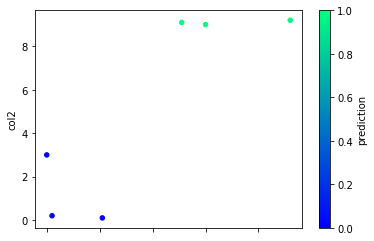

In [5]:
import pandas as pd

d = [{"id": 0, "col1": 0.0, "col2": 3.0, "prediction": 0},
    {"id": 1, "col1": 2.1, "col2": 0.1, "prediction": 0},
    {"id": 2, "col1": 0.2, "col2": 0.2, "prediction": 0},
    {"id": 3, "col1": 6.0, "col2": 9.0, "prediction": 1},
    {"id": 4, "col1": 5.1, "col2": 9.1, "prediction": 1},
    {"id": 5, "col1": 9.2, "col2": 9.2, "prediction": 1}]

df = pd.DataFrame(d)
print (df)

ax1 = df.plot.scatter(x='col1',
                      y='col2',
                      c='prediction', cmap='winter')